In [6]:
from Graph_directed import Graph
from GeneticAlgorithmTSP import GeneticAlgorithmTSP
import heapq
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
import random

Matplotlib is building the font cache; this may take a moment.


In [7]:
def generate_data(n,m,l,max_weight = 10, max_len_sfc = 4):
    input_graph = Graph({})
    sfc = []
    if (m > n*(n-1)):
        print('Too many vertex')
        return
    c = 1
    list_vertex = []
    while c < m:
        a = random.randint(1,n)
        b = random.randint(1,n)
        if (a != b) and ((a,b) not in list_vertex):
            list_vertex.append((a,b))
            input_graph.setAdjacent(str(a), str(b), random.randint(1,max_weight))
            c = c + 1
    start,end = random.sample(range(1,n), 2)
    input_graph.setStartEnd(start,finish)
    sfc.append(start)
    for i in range(l):
        sfc.append(random.sample(range(1,n), random.randint(1,max_len_sfc) ))
    sfc.append(end)


In [8]:
def abc(a,b,c=10):
    print(a , ' ', b , ' ',c)

In [10]:
def int_data(data):
    out = []
    for item in data:
        out.append(int(item))
    return out

In [11]:
input_graph = Graph({})
sfc = []
with open("input.txt","r") as f:
    n,m = int_data(f.readline().split())
    for _ in range(m):
        a,b,c = f.readline().split()
        input_graph.setAdjacent(str(a), str(b), int(c))
    start,finish = f.readline().split()
    num_sfc = int(f.readline())
    sfc.append(start)
    for _ in range(num_sfc):
        sfc.append(f.readline().split())
    sfc.append(finish)
input_graph.setStartEnd(start,finish)

In [12]:
def dijsktra(graph, initial):
  visited = {initial: 0}
  path = {}
  nodes = set(graph.getVertices())
  while nodes: 
    min_node = None
    for node in nodes:
      if node in visited:
        if min_node is None:
          min_node = node
        elif visited[node] < visited[min_node]:
          min_node = node
    if min_node is None:
      break
    nodes.remove(min_node)
    current_weight = visited[min_node]
    for edge in graph.getAdjacent(min_node):
      weight = current_weight + graph.getDistance(min_node, edge)
      if edge not in visited or weight < visited[edge]:
        visited[edge] = weight
        path[edge] = min_node
  return visited, path

In [13]:
sfc_item = []
for sfc_part in sfc:
    for item in sfc_part:
        sfc_item.append(item)
sfc_item = set(sfc_item)

In [14]:
dijsktra_dic = {}
dijsktra_path = {}
for item in sfc_item:
    dijsktra_dic[item] = dijsktra(input_graph,item)[0]
    dijsktra_path[item] = dijsktra(input_graph,item)[1]

In [15]:
dijsktra(input_graph,'1')

({'1': 0, '2': 3, '3': 1, '4': 4, '5': 2},
 {'2': '1', '3': '1', '4': '3', '5': '3'})

In [16]:
def full_path(path):
    fullpath = ''
    for i in range(len(path)-1):
        tmp = dijsktra_path[path[i]][path[i+1]]
        if tmp != path[i]:
            fullpath = fullpath + path[i] + tmp
        else:
            fullpath = fullpath + path[i]
    return fullpath + path[-1]

In [17]:
print(input_graph)

(1, 2, 3)	(1, 3, 1)	(1, 4, 5)	(2, 5, 5)	(3, 4, 3)	(3, 5, 1)	(4, 3, 1)	


In [18]:
input_graph.getDistance('1','3')

1

In [19]:
sfc_graph = Graph({})
for i in range(len(sfc)-1):
    for vertex in sfc[i]:
        for adj in sfc[i+1]:  
            try:
                sfc_graph.setAdjacent(vertex, adj, dijsktra_dic[vertex][adj])
                #print(vertex,' ', adj)
            except:
                import sys
                sfc_graph.setAdjacent(vertex, adj, sys.maxsize)
                #print(vertex,' ', adj)

In [20]:
graph = Graph({})
graph.setAdjacent('a', 'b', 4)
graph.setAdjacent('a', 'c', 4)
graph.setAdjacent('a', 'd', 7)
graph.setAdjacent('a', 'e', 3)
graph.setAdjacent('b', 'c', 2)
graph.setAdjacent('b', 'd', 3)
graph.setAdjacent('b', 'e', 5)
graph.setAdjacent('c', 'd', 2)
graph.setAdjacent('c', 'e', 3)
graph.setAdjacent('d', 'e', 6)

In [21]:
dijsktra(graph,'b')

({'b': 0, 'c': 2, 'd': 3, 'e': 5}, {'c': 'b', 'd': 'b', 'e': 'b'})

In [97]:
def draw_way(graph,path):
    G = nx.DiGraph(directed=True,format='weighted_adjacency_matrix')
    for i in range(len(path)-1):
        start = path[i]
        target = path[i+1]
        G.add_edge(start, target, weight=graph.getDistance(start,target))

    # Need to create a layout when doing
    options = {
        'node_color': 'red',
        'node_size': 500,
        'width': 3,
        'arrowstyle': '-|>',
        'arrowsize': 12,
    }

    pos = nx.spring_layout(G)
    nodes = {}
    for item in path:
        nodes[item] = str(item)
    nx.draw_networkx_edges(G,pos, connectionstyle='arc3, rad = 0.3', alpha=0.2)
    nx.draw_networkx_labels(G,pos,nodes,font_size=16,font_color='r')
    plt.savefig("output/Graph.png", format="PNG")
    # plt.show()

In [92]:
def draw_graph(graph):
    G = nx.DiGraph(directed=True,format='weighted_adjacency_matrix')
    for key in input_graph.graph.keys():
        value = input_graph.graph[key]
        for key2 in value.keys():
            G.add_edge(key, key2, weight=graph.getDistance(key,key2))
    # Need to create a layout when doing
    options = {
        'node_color': 'red',
        'node_size': 500,
        'width': 3,
        'arrowstyle': '-|>',
        'arrowsize': 12,
        # 'edge_labels':True,
        #  'graph_border':True
    }

    #pos = nx.spring_layout(G)
    #nx.draw_networkx(G, arrows=True, **options)
    pos = nx.spring_layout(G)
    emp = input_graph.getVertices()
    nodes = {}
    for item in emp:
        nodes[item] = str(item)
# Here there is the addition:

    edge_labels = dict([((u,v), round(d['weight'], 3))
             for u,v,d in G.edges(data=True)])

    #nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,label_pos=0.15, font_size=10)
    nx.draw_networkx_edges(G,pos, connectionstyle='arc3, rad = 0.3', alpha=0.2)
    nx.draw_networkx_labels(G,pos,nodes,font_size=20,font_color='r')
    # plt.axis('off')
    # plt.show()
    #plt.show()
    #H = G.plot(edge_labels=True, graph_border=True)
    #H.show()

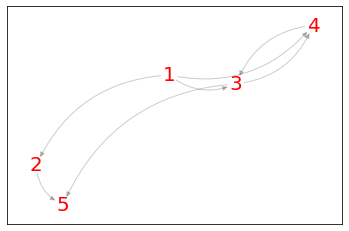

In [93]:
draw_graph(input_graph)

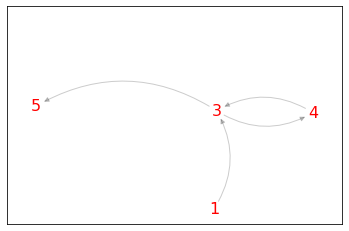

In [98]:
draw_way(input_graph,'13435')

In [59]:
input_graph.getVertices()

['1', '2', '3', '4', '5']